# Plotting invariant mass distributions and differences/ratios of mus

## (gen-match efficiency at the bottom)

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays
#plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities) 

plt.style.use(hep.style.CMS) # plotting style defined as CMS style

In [2]:
# Following are the 6 different root files used in the first method of processing
# samples = [
#     "2Mu2E_100GeV_5GeV_400mm",
#     "2Mu2E_100GeV_5GeV_200mm",
#     "2Mu2E_100GeV_5GeV_40mm",
#     "2Mu2E_100GeV_5GeV_4mm",
#     "2Mu2E_100GeV_5GeV_0p4mm",
# ]

samples = [
    "2Mu2E_800GeV_1p2GeV_1p2mm",
    "2Mu2E_800GeV_0p25GeV_1p2mm",
]

# samples = [
#     "2Mu2E_1000GeV_5GeV_40mm",
#     "2Mu2E_500GeV_5GeV_40mm",
#     "2Mu2E_100GeV_5GeV_40mm",
# ]

# samples = [
#     "2Mu2E_100GeV_5GeV_4mm",
#     "2Mu2E_150GeV_5GeV_2p7mm",
#     "2Mu2E_200GeV_5GeV_2mm",
#     "2Mu2E_500GeV_5GeV_0p8mm",
#     "2Mu2E_800GeV_5GeV_0p5mm",
#     "2Mu2E_1000GeV_5GeV_0p4mm",
# ]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

In [3]:

ch = "2mu2e"
runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e",
        "2mu2e_matchedLj"
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

ch1 = "2mu2e"
ch2 = "2mu2e_matchedLj"

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


# invariant mass distributions

## all lepton jets

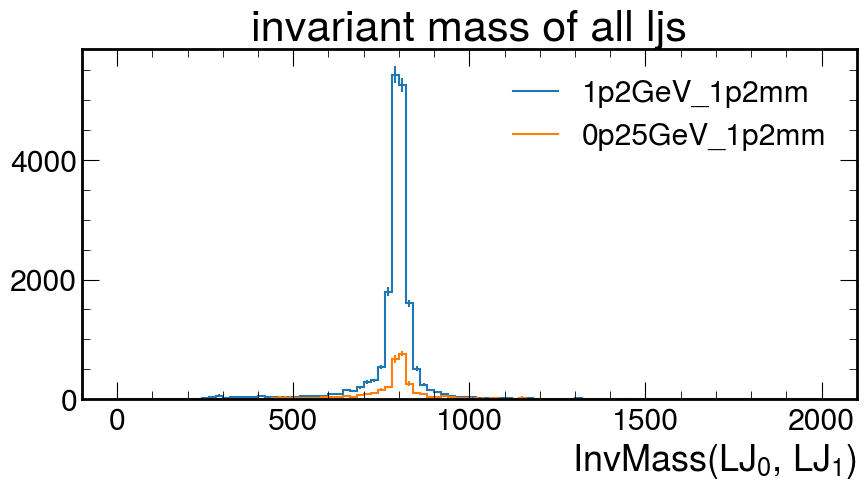

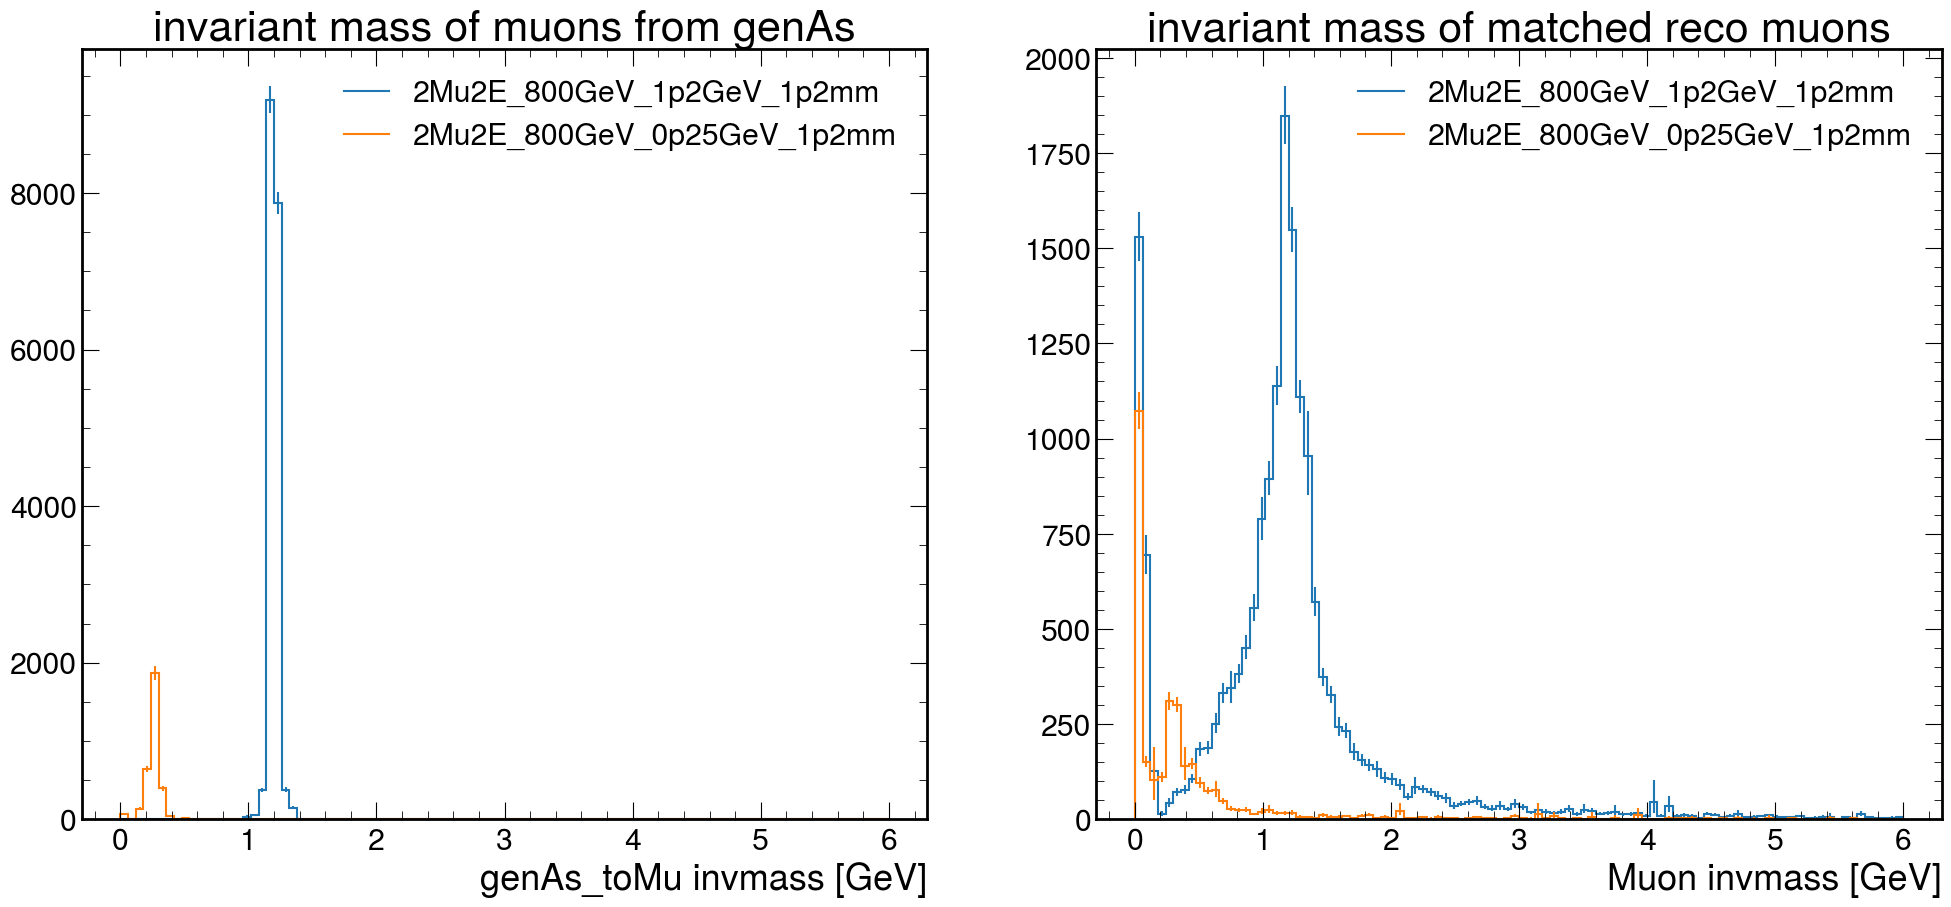

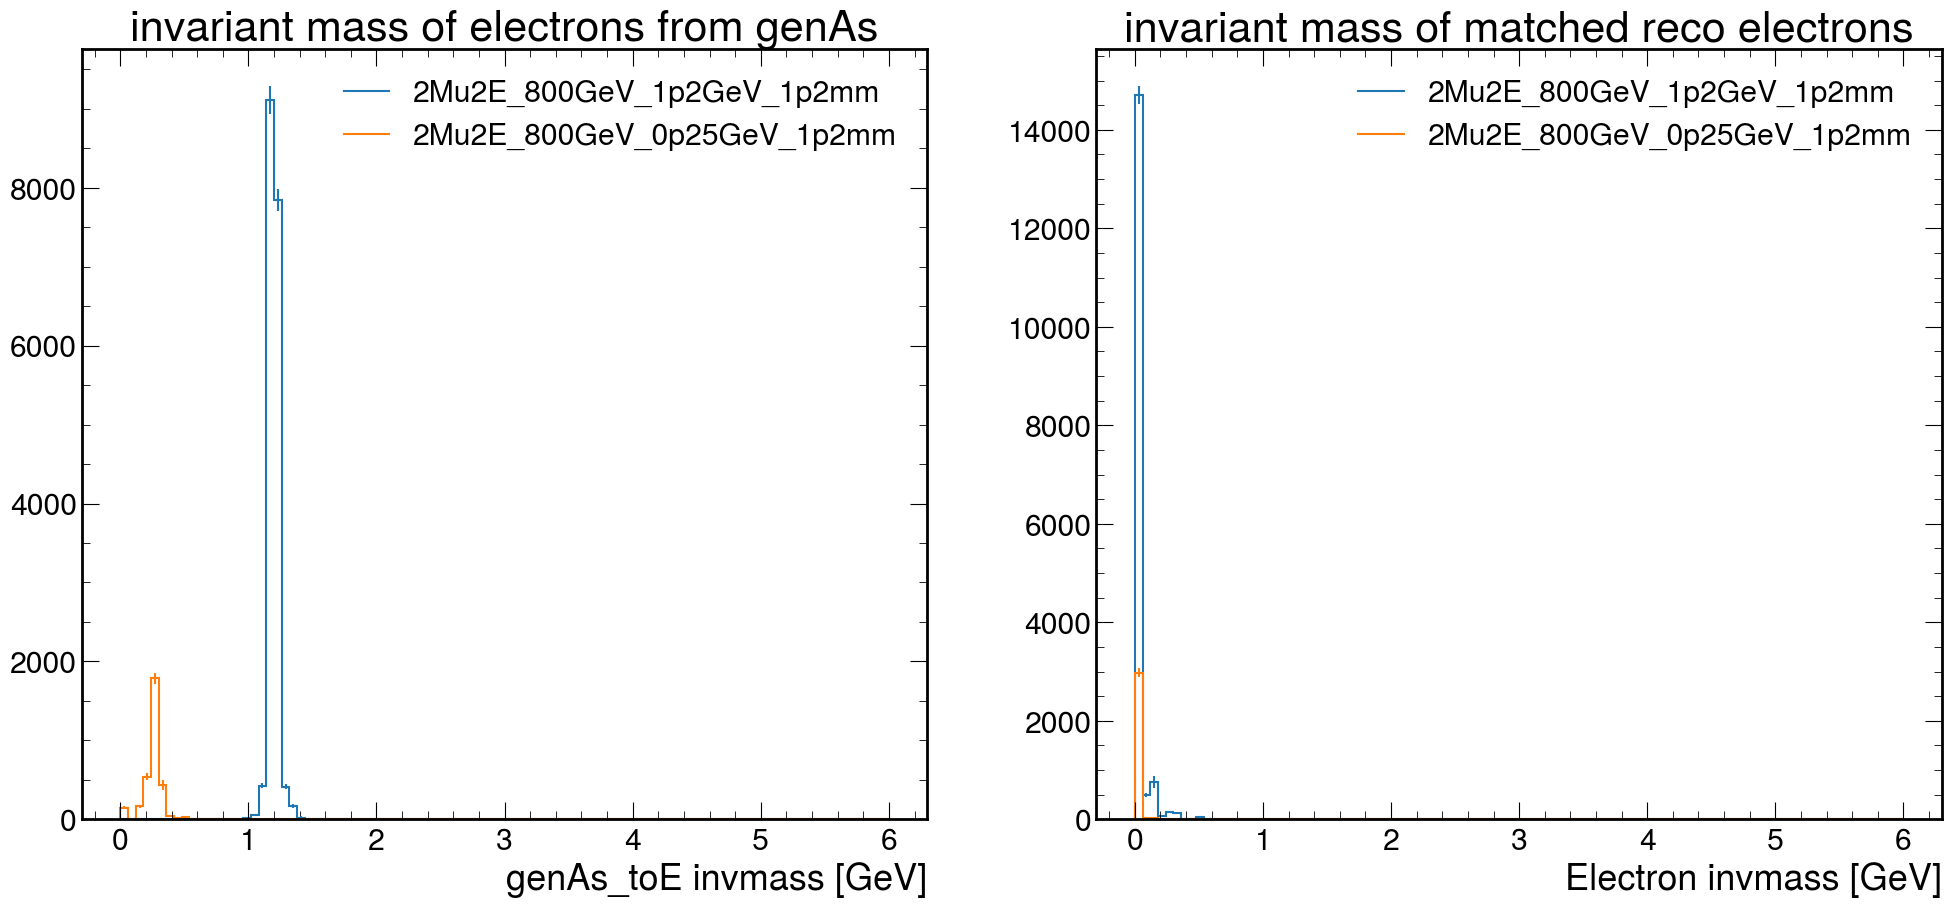

In [4]:
legend_entries = [s[13:] for s in samples]
nplots = 2

# LJs:
plt.subplot(2,1,1) # rows, columns, which subplot
for S in samples:  
    output["out"][S]["hists"]["lj_lj_invmass"][ch1,:].plot(density=False, flow='none')
plt.title("invariant mass of all ljs")
plt.legend(legend_entries, alignment="left")
#-----

# Muons:
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1,nplots,1) # rows, columns, which subplot
for S in samples:  # genAs_toMu_matched_lj
    output["out"][S]["hists"]["genAs_toMu_invmass"][ch1,:].plot(density=False, flow='none')
plt.title("invariant mass of muons from genAs")
plt.legend(samples)

plt.subplot(1,nplots,2)
for S in samples: # mu_mu_invmass_lowRange
    output["out"][S]["hists"]["muons_matched_muLj_invmass"][ch1,:].plot(density=False, flow='none')
plt.title("invariant mass of matched reco muons")
plt.legend(samples)
#-----

# Electrons:
plt.subplots(1, nplots, figsize=(nplots*12, 10))
plt.subplot(1,nplots,1)
for S in samples: # genAs_toE_matched_lj
    output["out"][S]["hists"]["genAs_toE_invmass"][ch1,:].plot(density=False, flow='none')
plt.title("invariant mass of electrons from genAs")
plt.legend(samples)

plt.subplot(1,nplots,2)
for S in samples: # egm_egm_invmass_lowRange | electron_invmass
    output["out"][S]["hists"]["electrons_matched_egmLj_invmass"][ch1,:].plot(density=False, flow='none')
plt.title("invariant mass of matched reco electrons")
plt.legend(samples)

## Discussion
invMass of ljs should yield the bound state mass.     
invMass of muons/electrons in an individual lj should yield the dark photon mass.     
    >> At present, there is not implementation to stop two leptons from matching to the same LJ. So the matching is v rudimentary. May also be matching 4+ electrons to a LJ in some events.